Author: Nik Alleyne <br>
Author Blog: **https://www.securitynik.com** <br>
Author GitHub: **github.com/securitynik** <br>

Author Books: [  <br>

                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" 
            ] 

### Why this series?
When teaching the SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals 
**https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/** I am always asked,
"Will you be sharing your demo notebooks?" or "Can we get a copy of your demo notebooks?" or ... well you get the point.
My answer is always no. Not that I do not want to share, (sharing is caring :-D) , but the demo notebooks 
by themselves, would not make sense or add real value. Hence, this series! 

This is my supplemental work, similar to what I would do in the demos but with a lot more details and references.


## 18. Beginning Deep Learning, - Classification - regression - MIMO - Functional API Tensorflow

### The series includes the following: <br>
01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning - Classification, Tensorflow <br>
17 - Beginning Deep Learning - Classification, Pytorch <br>
18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
22 - Beginning Model TFServing <br>

But conn.log is not the only log file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

23 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
24 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 25 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

If you find this series beneficial, I would greatly appreciate your feedback.


In [5]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# In the notebooks on Pandas, Matplotlib and Scaling
# we loaded our dataset such as
#   04 - Beginning Pandas <br>
#   05 - Beginning Matplotlib <br>
#   06 - Beginning Data Scaling <br># 
df_conn = pd.read_csv(r'df_conn_with_labels.csv', index_col=0)
df_conn

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,48798,0.000000,0,0,0,0,0,0,0
2,48804,0.000000,0,0,0,0,0,0,0
4,27761,0.000000,0,0,0,0,0,0,0
5,8888,0.053276,208,976,6,528,6,1296,0
6,8888,0.383646,227,692369,202,10739,117,240893,0
...,...,...,...,...,...,...,...,...,...
4430183,9200,0.000051,0,0,1,52,1,40,0
4430184,9200,0.000023,0,0,0,0,1,40,0
4430185,9200,0.000005,0,0,0,0,1,40,0
4430186,9200,0.000005,0,0,0,0,1,40,0


This file represents Zeek (formerly Bro) connection log - conn.log`. 
Zeek is a framework used for Network Security Monitoring. 
This entire series is based on using Zeek's data. 
The majority of the notebooks use the conn.log
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html


In [7]:
# Drop the port column
df_conn = df_conn.drop(columns=['id.resp_p'], inplace=False)
df_conn

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,0.000000,0,0,0,0,0,0,0
2,0.000000,0,0,0,0,0,0,0
4,0.000000,0,0,0,0,0,0,0
5,0.053276,208,976,6,528,6,1296,0
6,0.383646,227,692369,202,10739,117,240893,0
...,...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40,0
4430184,0.000023,0,0,0,0,1,40,0
4430185,0.000005,0,0,0,0,1,40,0
4430186,0.000005,0,0,0,0,1,40,0


In [8]:
# Looking at above, we see a number of records with 0s. 
# These will add no value to our learning process
# Let's find all those records and drop them
# Reference: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
df_conn = df_conn.drop(df_conn[(df_conn.duration == 0 ) & (df_conn.orig_bytes == 0 ) \
                               & (df_conn.resp_bytes == 0 ) & (df_conn.orig_pkts == 0 )  \
                                & (df_conn.orig_ip_bytes == 0 ) & (df_conn.resp_pkts == 0 ) \
                                    & (df_conn.resp_ip_bytes == 0 )].index)
df_conn

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
5,0.053276,208,976,6,528,6,1296,0
6,0.383646,227,692369,202,10739,117,240893,0
7,0.054294,208,977,6,528,6,1297,0
8,0.424980,227,791633,176,9387,174,367737,0
9,0.272567,227,406607,171,9127,71,169939,0
...,...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40,0
4430184,0.000023,0,0,0,0,1,40,0
4430185,0.000005,0,0,0,0,1,40,0
4430186,0.000005,0,0,0,0,1,40,0


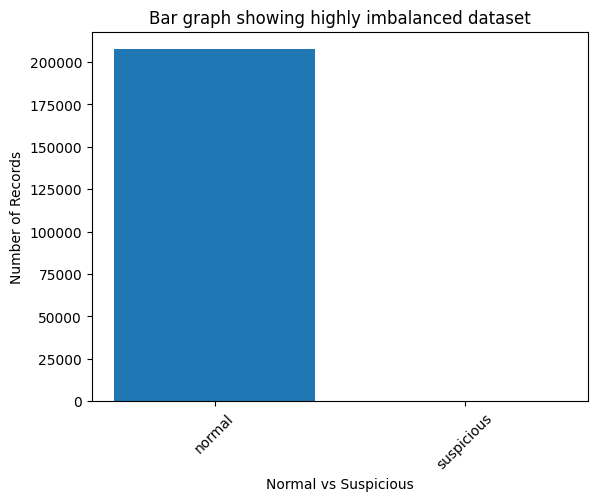

In [9]:
# The graph below shows this dataset is highly imbalanced.
# As a result, using measures like accuracy is more than likely not the best 
# approach, to understand how well our eventual model has "learned"
# via the training data
plt.title('Bar graph showing highly imbalanced dataset')
plt.bar(x=['normal', 'suspicious'], height=[ df_conn[df_conn.label == 0].shape[0], \
                                            df_conn[df_conn.label == 1].shape[0] ])
plt.ylabel(ylabel='Number of Records')
plt.xlabel(xlabel='Normal vs Suspicious')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Getting the percentage of samples that are considered suspicious in this dataset
# This is going to be quite a challenge for this learning algorithm
(df_conn[df_conn.label == 1].shape[0] / df_conn.shape[0]) * 100

0.032272359446649454

In [11]:
# Extract the X_data to be used for the classification part of the model
X_clf = df_conn.drop(columns=['label'], inplace=False)
X_clf

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
5,0.053276,208,976,6,528,6,1296
6,0.383646,227,692369,202,10739,117,240893
7,0.054294,208,977,6,528,6,1297
8,0.424980,227,791633,176,9387,174,367737
9,0.272567,227,406607,171,9127,71,169939
...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40
4430184,0.000023,0,0,0,0,1,40
4430185,0.000005,0,0,0,0,1,40
4430186,0.000005,0,0,0,0,1,40


In [12]:
# Extract the labels to be used for classification
y_label = df_conn.label
y_label

5          0
6          0
7          0
8          0
9          0
          ..
4430183    0
4430184    0
4430185    0
4430186    0
4430187    0
Name: label, Length: 207608, dtype: int64

In [13]:
# In the linear regression notebooks, we attempted to predict the resp_ip_bytes
#   11. Beginning Linear Regression - Machine Learning
#   14. Beginning Deep Learning, - Linear Regression, Tensorflow
#   15. Beginning Deep Learning, - Linear Regression, PyTorch  

# Doing something different this time.
# Let's use the orig_bytes to predict the resp_bytes 
# We will then use the combination of regression results and the classification results 
# to conclude if something is suspicious
# Also I choose these two because there is somewhat of a linear relationship between the two
X_reg = df_conn[['orig_bytes', 'resp_bytes']]
X_reg


,orig_bytes,resp_bytes
5,208,976
6,227,692369
7,208,977
8,227,791633
9,227,406607
...,...,...
4430183,0,0
4430184,0,0
4430185,0,0
4430186,0,0


In [14]:
# Is there a relationship between these two variables?
# Below suggest no
X_reg.corr(method='pearson')

,orig_bytes,resp_bytes
orig_bytes,1.000000,0.139104
resp_bytes,0.139104,1.000000


Text(0, 0.5, 'Responder Bytes')

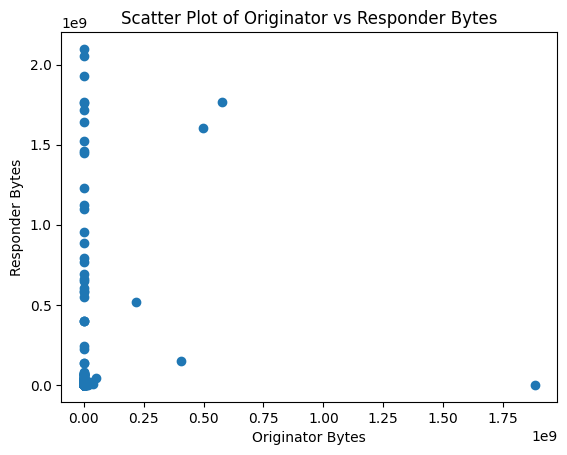

In [15]:
# Do we have a linear relationship here? A better view
plt.title('Scatter Plot of Originator vs Responder Bytes')
plt.scatter(x=X_reg.orig_bytes, y=X_reg.resp_bytes)
plt.xlabel('Originator Bytes')
plt.ylabel('Responder Bytes')

In [16]:
# prepare to split the datasets into training and testing sets
from sklearn.model_selection import train_test_split

In [17]:
# Split the classification data into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf.values, y_label, test_size=0.2, \
                                                                    train_size=0.8, stratify=y_label, random_state=10)
X_train_clf.shape, y_train_clf.shape, X_test_clf.shape, y_test_clf.shape

((166086, 7), (166086,), (41522, 7), (41522,))

In [18]:
# Split the regression data also into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg.orig_bytes.values.reshape(-1,1),  \
                                                                    X_reg.resp_bytes.values, train_size=0.8, random_state=10)
X_train_reg.shape, y_train_reg.shape, X_test_reg.shape, y_test_reg.shape

((166086, 1), (166086,), (41522, 1), (41522,))

In [19]:
# Scaling the data first
# We learned more about scaling in
#   06 - Beginning Data Scaling
# import the scaler library
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Setup the scaler for classification
min_max_clf = MinMaxScaler(feature_range=(0,1))

# Fit on the classification training data
min_max_clf.fit(X_train_clf)

# Transform the train data
X_train_clf = min_max_clf.transform(X_train_clf)
X_train_clf, X_train_clf.shape

(array([[2.63072563e-07, 9.18795041e-08, 7.10178687e-08, ...,
         3.59579942e-07, 1.75013957e-06, 3.05765612e-07],
        [3.61672231e-07, 5.89415687e-08, 2.38314996e-08, ...,
         2.75234030e-07, 1.75013957e-06, 1.34744168e-07],
        [2.79225614e-09, 0.00000000e+00, 0.00000000e+00, ...,
         2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
        ...,
        [1.68135854e-09, 0.00000000e+00, 0.00000000e+00, ...,
         2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
        [1.65133428e-09, 0.00000000e+00, 0.00000000e+00, ...,
         2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
        [3.49932746e-07, 7.80108997e-08, 8.38868784e-08, ...,
         3.24065874e-07, 1.75013957e-06, 3.52407824e-07]]),
 (166086, 7))

In [21]:
# Scale/transform the classification test data 
X_test_clf = min_max_clf.transform(X_test_clf)
X_test_clf

array([[1.73484676e-05, 3.90054499e-07, 8.33234064e-04, ...,
        7.60578166e-05, 6.94805411e-04, 1.16707452e-03],
       [5.08070521e-07, 6.41422953e-08, 5.29059290e-08, ...,
        2.88551805e-07, 1.75013957e-06, 2.40121018e-07],
       [4.43809598e-06, 2.05948775e-06, 1.84884774e-05, ...,
        9.69534066e-06, 5.60044664e-05, 6.65187043e-05],
       ...,
       [5.47522398e-07, 6.41422953e-08, 8.96064383e-08, ...,
        2.88551805e-07, 1.75013957e-06, 3.73137696e-07],
       [1.83147984e-09, 0.00000000e+00, 0.00000000e+00, ...,
        2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.95094010e-07, 0.00000000e+00, 0.00000000e+00]])

In [22]:
# Import PCA to leverage dimensionality reduction
from sklearn.decomposition import PCA

In [23]:
# Setup PCA to use 3 principal Components
# We learned about PCA in
#   07 - Beginning Principal Component Analysis (PCA)
pca = PCA(n_components=3, random_state=10)
pca

PCA(n_components=3, random_state=10)

In [24]:
# Fit the PCA on the X_train classification data
pca.fit(X_train_clf)

# Transform the training classification data 
X_train_clf = pca.transform(X_train_clf)
X_train_clf

array([[-0.00025828, -0.00023497, -0.00047665],
       [-0.00025839, -0.00023502, -0.00047653],
       [-0.00025846, -0.00023515, -0.00047686],
       ...,
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025826, -0.00023494, -0.00047657]])

In [25]:
# Use the opportunity to PCA transform the X_test classification data
X_test_clf = pca.transform(X_test_clf)
X_test_clf

array([[ 0.00134937,  0.000691  , -0.0008094 ],
       [-0.00025832, -0.00023494, -0.0004764 ],
       [-0.00018612, -0.00015918, -0.0004979 ],
       ...,
       [-0.00025824, -0.00023488, -0.00047639],
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025896, -0.0002359 , -0.00047662]])

In [26]:
# Scale the regression data
# Need to setup a new scaler
# While the regression data is a subset of the original data, 
# we need to keep in mind that scaler was trained on  7 features. 
# Hence we cannot transform this data but instead need to setup a new scaler for this one feature
# The new X data has 1 feature

min_max_reg = MinMaxScaler(feature_range=(0,1))
min_max_reg.fit(X_train_reg)

X_train_reg = min_max_reg.transform(X_train_reg)
X_train_reg

array([[1.05184152e-07],
       [0.00000000e+00],
       [0.00000000e+00],
       ...,
       [8.80253231e-07],
       [0.00000000e+00],
       [1.05184152e-07]])

In [27]:
#  Transform the training data
X_test_reg = min_max_reg.transform(X_test_reg)
X_test_reg

array([[1.54057596e-08],
       [0.00000000e+00],
       [0.00000000e+00],
       ...,
       [0.00000000e+00],
       [0.00000000e+00],
       [1.05184152e-07]])

In [28]:
# Let's use the opportunity to scale the target variable also
# We don't need to but doing something different
y_train_reg = min_max_reg.transform(y_train_reg.reshape(-1,1))
y_test__reg = min_max_reg.transform(y_test_reg.reshape(-1,1))
y_train_reg[:5], y_test_reg[:5]

(array([[5.18483496e-07],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]]),
 array([164,   0,   0, 545,   0], dtype=int64))

In [29]:
# In this notebook, I'm using  the  Functional API as in the other notebooks, I used subclassing and sequential class.
#   12. Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow
#   13. Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch
#   14. Beginning Deep Learning, - Linear Regression, Tensorflow
#   15. Beginning Deep Learning, - Linear Regression, PyTorch
#   16. Beginning Deep Learning, - Classification, Tensorflow
#   17. Beginning Deep Learning, - Classification, Pytorch
# https://www.tensorflow.org/guide/keras/functional

In [30]:
# Import tensorflow
import tensorflow as tf

In [31]:
# Setup the classification input layer
clf_input = tf.keras.layers.Input(shape=(X_train_clf.shape[1],), name='classification_input', dtype=tf.float32)
clf_input


<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'classification_input')>

In [33]:
# Setup the regression input
reg_input = tf.keras.layers.Input(shape=(1,), name='regression_input', dtype=tf.float32)
reg_input

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'regression_input')>

In [34]:
# Get insights into the inputs shape and datatypes
reg_input.shape, reg_input.dtype, clf_input.shape, clf_input.dtype

(TensorShape([None, 1]), tf.float32, TensorShape([None, 3]), tf.float32)

In [35]:
# Setup the Dense layers and dropout (Regularization) layer for regression
# Dropout is covered in notebook
#   21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
reg_x = tf.keras.layers.Dense(units=8, activation='relu', name='reg_hidden_1')(reg_input)
reg_x = tf.keras.layers.Dropout(rate=0.25, name='reg_dropout_1')(reg_x)
reg_x = tf.keras.layers.Dense(units=8, activation='relu', name='reg_hidden_2')(reg_x)
reg_x


<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'reg_hidden_2')>

In [36]:
# Setup the classification Dense and Dropout (regularization) layers 
clf_x = tf.keras.layers.Dense(units=4, activation='relu', name='clf_hidden_1')(clf_input)
clf_x = tf.keras.layers.Dropout(rate=0.25, name='clf_dropout_1')(clf_x)
clf_x = tf.keras.layers.Dense(units=4, activation='relu', name='clf_hidden_2')(clf_x)
clf_x = tf.keras.layers.Dropout(rate=0.25, name='clf_dropout_2')(clf_x)
clf_x = tf.keras.layers.Dense(units=4, activation='relu', name='clf_hidden_3')(clf_x)
clf_x

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'clf_hidden_3')>

In [37]:
# Setup a shared layer
# This layer is used for both classification and regression
reg_clf_x = tf.keras.layers.concatenate([reg_x, clf_x], name='concatenated_shared_layer')
reg_clf_dropout = tf.keras.layers.Dropout(rate=0.25, name='reg_clf_dropout_3')(reg_clf_x)

In [38]:
# Setup the output layers
# Each output will have its input as the shared layer
reg_output = tf.keras.layers.Dense(units=1, activation='linear', name='reg_output')(reg_clf_dropout)
clf_output = tf.keras.layers.Dense(units=1, activation='sigmoid', name='clf_output')(reg_clf_dropout)
reg_output, clf_output

(<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'reg_output')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'clf_output')>)

In [39]:
# Compile the model
reg_clf_model = tf.keras.Model(inputs=[reg_input, clf_input], outputs=[reg_output, clf_output], \
                               name='regression_classification_model')

# Get the model summary
reg_clf_model.summary()

Model: "regression_classification_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 classification_input (InputLay  [(None, 3)]         0           []                               
 er)                                                                                              
                                                                                                  
 clf_hidden_1 (Dense)           (None, 4)            16          ['classification_input[0][0]']   
                                                                                                  
 regression_input (InputLayer)  [(None, 1)]          0           []                               
                                                                                                  
 clf_dropout_1 (Dropout)        (None, 4)            0           ['c

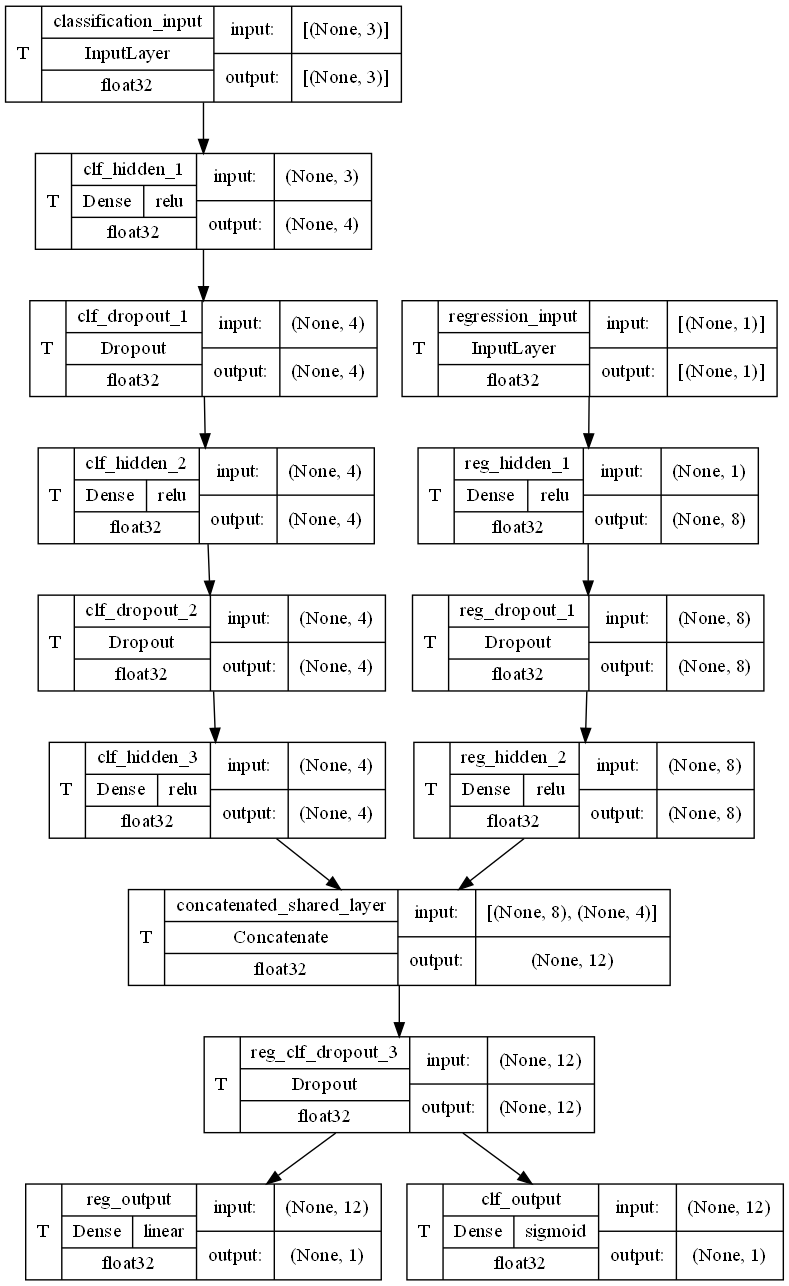

In [40]:
# Plot the model to see the model architecture
# Save the model to disk also
tf.keras.utils.plot_model(model=reg_clf_model, to_file='./reg_clf_model.png', dpi=100, show_dtype=True, \
                          show_layer_activations=True, show_layer_names=True, show_shapes=True, show_trainable=True)

In [41]:
# compile the model
# Give the classification loss greater priority than the regression loss
reg_clf_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), \
                      loss={'reg_output' : tf.keras.losses.MeanAbsoluteError(), \
                            'clf_output': tf.keras.losses.BinaryCrossentropy()}, \
                                metrics={'reg_output': tf.keras.metrics.mae, 'clf_output' : tf.keras.metrics.Recall() }, \
                                    loss_weights={'reg_output' : 1, 'clf_output': 3} )

In [42]:
# Define the callbacks
# Also save the model as we go. This is helpful if training on a very large dataset
# Also reduce the learning rate when metric has stopped improving
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau
callbacks = [ 
                tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min', \
                                                 restore_best_weights=True, verbose=1), 
                tf.keras.callbacks.ModelCheckpoint(filepath=r'.', monitor='val_loss', verbose=1, \
                                                   save_best_only=True, save_weights_only=False, \
                                                    save_freq='epoch', mode='min'),
                tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, mode='min', min_lr=0., \
                                                     min_delta=0.001, verbose=1)
              ]

In [43]:
# Train the model for 10 epochs
# Not that 10 epochs is correct, just in the interest of time, I choose 10
reg_clf_model.fit({'regression_input':X_train_reg, 'classification_input':X_train_clf}, \
                  {'reg_output':y_train_reg, 'clf_output': y_train_clf}, epochs=10, validation_split=0.2, \
                    batch_size=32, callbacks=callbacks)

Epoch 1/10
4149/4153 [============================>.] - ETA: 0s - loss: 0.1251 - reg_output_loss: 0.0073 - clf_output_loss: 0.0393 - reg_output_mean_absolute_error: 0.0073 - clf_output_recall: 0.0000e+00
Epoch 1: val_loss improved from inf to 0.01498, saving model to .


INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


4153/4153 [==============================] - 21s 4ms/step - loss: 0.1250 - reg_output_loss: 0.0073 - clf_output_loss: 0.0392 - reg_output_mean_absolute_error: 0.0073 - clf_output_recall: 0.0000e+00 - val_loss: 0.0150 - val_reg_output_loss: 2.2282e-04 - val_clf_output_loss: 0.0049 - val_reg_output_mean_absolute_error: 2.2282e-04 - val_clf_output_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/10
4152/4153 [============================>.] - ETA: 0s - loss: 0.0164 - reg_output_loss: 9.8664e-04 - clf_output_loss: 0.0051 - reg_output_mean_absolute_error: 9.8664e-04 - clf_output_recall: 0.0000e+00
Epoch 2: val_loss improved from 0.01498 to 0.01493, saving model to .


INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


4153/4153 [==============================] - 17s 4ms/step - loss: 0.0164 - reg_output_loss: 9.8666e-04 - clf_output_loss: 0.0051 - reg_output_mean_absolute_error: 9.8666e-04 - clf_output_recall: 0.0000e+00 - val_loss: 0.0149 - val_reg_output_loss: 9.5626e-04 - val_clf_output_loss: 0.0047 - val_reg_output_mean_absolute_error: 9.5626e-04 - val_clf_output_recall: 0.0000e+00 - lr: 0.0010
Epoch 3/10
4148/4153 [============================>.] - ETA: 0s - loss: 0.0140 - reg_output_loss: 8.4272e-04 - clf_output_loss: 0.0044 - reg_output_mean_absolute_error: 8.4272e-04 - clf_output_recall: 0.0000e+00
Epoch 3: val_loss improved from 0.01493 to 0.01175, saving model to .


INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


4153/4153 [==============================] - 19s 5ms/step - loss: 0.0140 - reg_output_loss: 8.4216e-04 - clf_output_loss: 0.0044 - reg_output_mean_absolute_error: 8.4216e-04 - clf_output_recall: 0.0000e+00 - val_loss: 0.0118 - val_reg_output_loss: 2.8471e-04 - val_clf_output_loss: 0.0038 - val_reg_output_mean_absolute_error: 2.8471e-04 - val_clf_output_recall: 0.0000e+00 - lr: 0.0010
Epoch 4/10
4148/4153 [============================>.] - ETA: 0s - loss: 0.0121 - reg_output_loss: 7.7172e-04 - clf_output_loss: 0.0038 - reg_output_mean_absolute_error: 7.7172e-04 - clf_output_recall: 0.0000e+00
Epoch 4: val_loss improved from 0.01175 to 0.01144, saving model to .


INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


4153/4153 [==============================] - 17s 4ms/step - loss: 0.0121 - reg_output_loss: 7.7205e-04 - clf_output_loss: 0.0038 - reg_output_mean_absolute_error: 7.7205e-04 - clf_output_recall: 0.0000e+00 - val_loss: 0.0114 - val_reg_output_loss: 5.3110e-04 - val_clf_output_loss: 0.0036 - val_reg_output_mean_absolute_error: 5.3110e-04 - val_clf_output_recall: 0.0000e+00 - lr: 0.0010
Epoch 5/10
4144/4153 [============================>.] - ETA: 0s - loss: 0.0113 - reg_output_loss: 6.9342e-04 - clf_output_loss: 0.0035 - reg_output_mean_absolute_error: 6.9342e-04 - clf_output_recall: 0.0000e+00
Epoch 5: val_loss improved from 0.01144 to 0.01137, saving model to .


INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


4153/4153 [==============================] - 18s 4ms/step - loss: 0.0113 - reg_output_loss: 6.9293e-04 - clf_output_loss: 0.0035 - reg_output_mean_absolute_error: 6.9293e-04 - clf_output_recall: 0.0000e+00 - val_loss: 0.0114 - val_reg_output_loss: 2.0820e-04 - val_clf_output_loss: 0.0037 - val_reg_output_mean_absolute_error: 2.0820e-04 - val_clf_output_recall: 0.0000e+00 - lr: 0.0010
Epoch 6/10
4151/4153 [============================>.] - ETA: 0s - loss: 0.0107 - reg_output_loss: 6.9557e-04 - clf_output_loss: 0.0033 - reg_output_mean_absolute_error: 6.9557e-04 - clf_output_recall: 0.0000e+00
Epoch 6: val_loss did not improve from 0.01137
4153/4153 [==============================] - 14s 3ms/step - loss: 0.0107 - reg_output_loss: 6.9553e-04 - clf_output_loss: 0.0033 - reg_output_mean_absolute_error: 6.9553e-04 - clf_output_recall: 0.0000e+00 - val_loss: 0.0118 - val_reg_output_loss: 0.0011 - val_clf_output_loss: 0.0036 - val_reg_output_mean_absolute_error: 0.0011 - val_clf_output_recall:

In [45]:
# Get the model history
reg_clf_model.history.history

{'loss': [0.12498622387647629,
  0.016415990889072418,
  0.0140103530138731,
  0.012080865912139416,
  0.011306291446089745,
  0.01072909589856863,
  0.010034793056547642,
  0.00965377502143383],
 'reg_output_loss': [0.007252467330545187,
  0.00098665920086205,
  0.0008421618258580565,
  0.0007720503490418196,
  0.0006929279770702124,
  0.0006955326534807682,
  0.0006414543022401631,
  0.0006058807484805584],
 'clf_output_loss': [0.03924474120140076,
  0.005143121816217899,
  0.004389393609017134,
  0.003769602859392762,
  0.003537781536579132,
  0.003344523487612605,
  0.0031311174388974905,
  0.003015960566699505],
 'reg_output_mean_absolute_error': [0.007252467330545187,
  0.00098665920086205,
  0.0008421618258580565,
  0.0007720503490418196,
  0.0006929279770702124,
  0.0006955326534807682,
  0.0006414543022401631,
  0.0006058807484805584],
 'clf_output_recall': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_loss': [0.014977059327065945,
  0.014925003051757812,
  0.011751390062272

In [46]:
# Get the various keys in the history
reg_clf_model.history.history.keys()

dict_keys(['loss', 'reg_output_loss', 'clf_output_loss', 'reg_output_mean_absolute_error', 'clf_output_recall', 'val_loss', 'val_reg_output_loss', 'val_clf_output_loss', 'val_reg_output_mean_absolute_error', 'val_clf_output_recall', 'lr'])

In [47]:
# How did our algorithm perform
print(reg_clf_model.history.history)

{'loss': [0.12498622387647629, 0.016415990889072418, 0.0140103530138731, 0.012080865912139416, 0.011306291446089745, 0.01072909589856863, 0.010034793056547642, 0.00965377502143383], 'reg_output_loss': [0.007252467330545187, 0.00098665920086205, 0.0008421618258580565, 0.0007720503490418196, 0.0006929279770702124, 0.0006955326534807682, 0.0006414543022401631, 0.0006058807484805584], 'clf_output_loss': [0.03924474120140076, 0.005143121816217899, 0.004389393609017134, 0.003769602859392762, 0.003537781536579132, 0.003344523487612605, 0.0031311174388974905, 0.003015960566699505], 'reg_output_mean_absolute_error': [0.007252467330545187, 0.00098665920086205, 0.0008421618258580565, 0.0007720503490418196, 0.0006929279770702124, 0.0006955326534807682, 0.0006414543022401631, 0.0006058807484805584], 'clf_output_recall': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'val_loss': [0.014977059327065945, 0.014925003051757812, 0.011751390062272549, 0.011441056616604328, 0.011373016983270645, 0.01181337889283

In [48]:
# Get the loss as a dataframe
pd.DataFrame(reg_clf_model.history.history)

,loss,reg_output_loss,clf_output_loss,reg_output_mean_absolute_error,clf_output_recall,val_loss,val_reg_output_loss,val_clf_output_loss,val_reg_output_mean_absolute_error,val_clf_output_recall,lr
0,0.124986,0.007252,0.039245,0.007252,0.0,0.014977,0.000223,0.004918,0.000223,0.0,0.001
1,0.016416,0.000987,0.005143,0.000987,0.0,0.014925,0.000956,0.004656,0.000956,0.0,0.001
2,0.014010,0.000842,0.004389,0.000842,0.0,0.011751,0.000285,0.003822,0.000285,0.0,0.001
3,0.012081,0.000772,0.003770,0.000772,0.0,0.011441,0.000531,0.003637,0.000531,0.0,0.001
4,0.011306,0.000693,0.003538,0.000693,0.0,0.011373,0.000208,0.003722,0.000208,0.0,0.001
5,0.010729,0.000696,0.003345,0.000696,0.0,0.011813,0.001054,0.003586,0.001054,0.0,0.001
6,0.010035,0.000641,0.003131,0.000641,0.0,0.012044,0.001463,0.003527,0.001463,0.0,0.001
7,0.009654,0.000606,0.003016,0.000606,0.0,0.011878,0.001467,0.003471,0.001467,0.0,0.001


In [49]:
# A clearer view
# Transpose the dataset looking across the epochs
pd.DataFrame(reg_clf_model.history.history).transpose()

,0,1,2,3,4,5,6,7
loss,0.124986,0.016416,0.014010,0.012081,0.011306,0.010729,0.010035,0.009654
reg_output_loss,0.007252,0.000987,0.000842,0.000772,0.000693,0.000696,0.000641,0.000606
clf_output_loss,0.039245,0.005143,0.004389,0.003770,0.003538,0.003345,0.003131,0.003016
reg_output_mean_absolute_error,0.007252,0.000987,0.000842,0.000772,0.000693,0.000696,0.000641,0.000606
clf_output_recall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
val_loss,0.014977,0.014925,0.011751,0.011441,0.011373,0.011813,0.012044,0.011878
val_reg_output_loss,0.000223,0.000956,0.000285,0.000531,0.000208,0.001054,0.001463,0.001467
val_clf_output_loss,0.004918,0.004656,0.003822,0.003637,0.003722,0.003586,0.003527,0.003471
val_reg_output_mean_absolute_error,0.000223,0.000956,0.000285,0.000531,0.000208,0.001054,0.001463,0.001467
val_clf_output_recall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


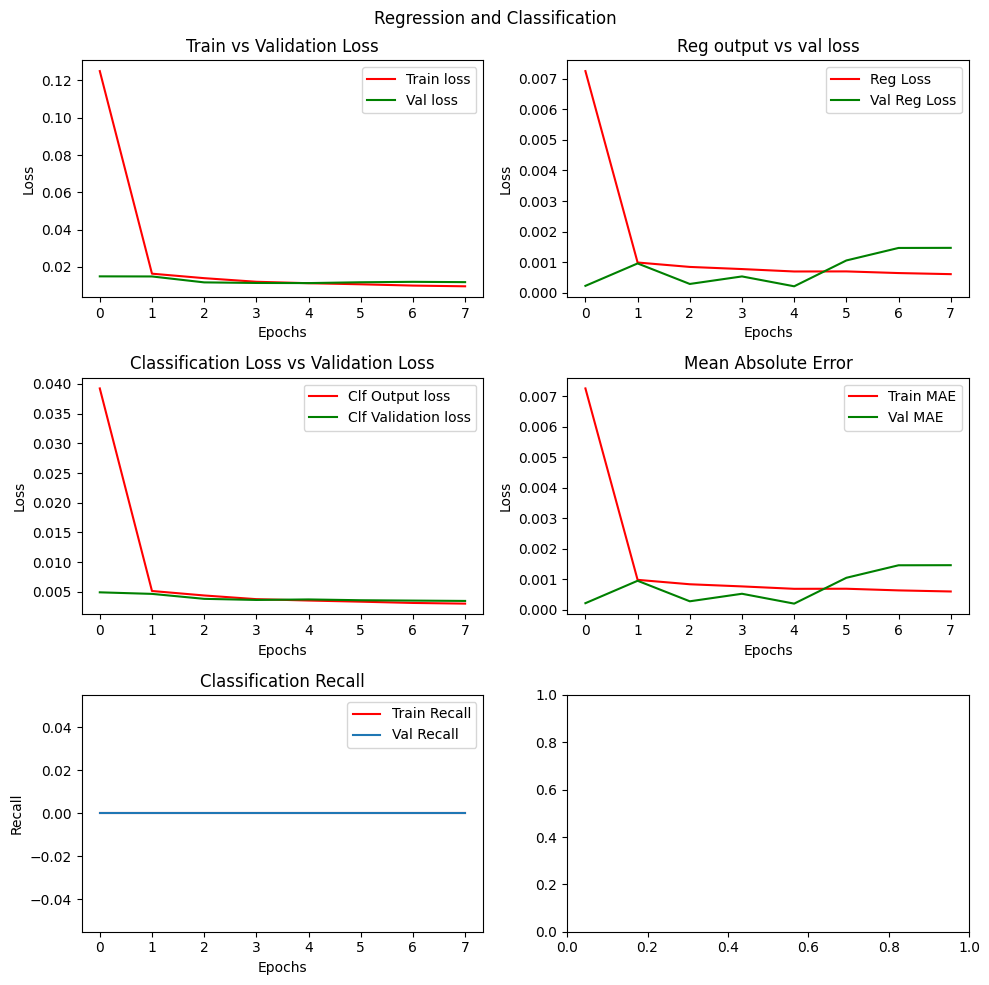

In [50]:
# plot the loss and accuracy
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# We can see from below the loss has decreased while the accuracy has increased.
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))
plt.suptitle('Regression and Classification')

ax[0][0].plot(reg_clf_model.history.history['loss'], 'r', reg_clf_model.history.history['val_loss'], 'g' )
ax[0][0].set_title('Train vs Validation Loss')
ax[0][0].legend(labels=['Train loss', 'Val loss'])
ax[0][0].set_xlabel('Epochs')
ax[0][0].set_ylabel('Loss')

ax[0][1].plot(reg_clf_model.history.history['reg_output_loss'], 'r', \
              reg_clf_model.history.history['val_reg_output_loss'], 'g' )
ax[0][1].set_title('Reg output vs val loss')
ax[0][1].legend(labels=['Reg Loss', 'Val Reg Loss'])
ax[0][1].set_xlabel('Epochs')
ax[0][1].set_ylabel('Loss')

ax[1][0].plot(reg_clf_model.history.history['clf_output_loss'], 'r', \
              reg_clf_model.history.history['val_clf_output_loss'], 'g' )
ax[1][0].set_title('Classification Loss vs Validation Loss')
ax[1][0].legend(labels=['Clf Output loss', 'Clf Validation loss'])
ax[1][0].set_xlabel('Epochs')
ax[1][0].set_ylabel('Loss')

ax[1][1].plot(reg_clf_model.history.history['reg_output_mean_absolute_error'], 'r', \
              reg_clf_model.history.history['val_reg_output_mean_absolute_error'], 'g' )
ax[1][1].set_title('Mean Absolute Error')
ax[1][1].legend(labels=['Train MAE', 'Val MAE'])
ax[1][1].set_xlabel('Epochs')
ax[1][1].set_ylabel('Loss')

ax[2][0].plot(reg_clf_model.history.history['clf_output_recall'], 'r', reg_clf_model.history.history['val_clf_output_recall'] )
ax[2][0].set_title('Classification Recall')
ax[2][0].legend(labels=['Train Recall', 'Val Recall'])
ax[2][0].set_xlabel('Epochs')
ax[2][0].set_ylabel('Recall')

plt.tight_layout()

plt.show()

In [51]:
# Evaluate the model
# Notice the input consists of values for both regression and classification
# Notice the x and y are in the same order as when the model was trained
results = reg_clf_model.evaluate(x=[X_test_reg, X_test_clf], y=[y_test_reg, y_test_clf])
results

1298/1298 [==============================] - 3s 2ms/step - loss: 294384.2812 - reg_output_loss: 294384.2812 - clf_output_loss: 0.0030 - reg_output_mean_absolute_error: 294384.2812 - clf_output_recall: 0.0000e+00


[294384.28125, 294384.28125, 0.0030157214496284723, 294384.28125, 0.0]

In [52]:
# Review the evaluation metrics from a different perspective
dict(zip(reg_clf_model.metrics_names, results))

{'loss': 294384.28125,
 'reg_output_loss': 294384.28125,
 'clf_output_loss': 0.0030157214496284723,
 'reg_output_mean_absolute_error': 294384.28125,
 'clf_output_recall': 0.0}

In [53]:
# Define an x for prediction
#new_clf_sample = np.array([0.053276, 208, 976, 6, 528, 6, 1296], ndmin=2)
new_clf_sample = np.array([60, 219876, 77765, 239747, 1251154, 169995, 209977], ndmin=2)
new_clf_sample

array([[     60,  219876,   77765,  239747, 1251154,  169995,  209977]])

In [54]:
# New regression sample
new_reg_sample = np.array([998654], ndmin=2)
new_reg_sample

array([[998654]])

In [55]:
# Predict the number of bytes and the class
reg_pred, clf_pred = reg_clf_model.predict(x=[min_max_reg.transform(new_reg_sample), \
                                              pca.transform(min_max_clf.transform(new_clf_sample))] )

# What does the predictions looks like
reg_pred, clf_pred

1/1 [==============================] - 0s 202ms/step


(array([[-9.404879e-05]], dtype=float32), array([[0.00014536]], dtype=float32))

In [56]:
# Invert the transformation
# Convert the values to integers
# Well we know that we cannot have negative bytes, so this regression aspect of the model needs work
int(min_max_reg.inverse_transform(reg_pred))

-177038

In [57]:
# Did scaling the target contribute to this terrible output
# Maybe, maybe not. I'm not interested in finding out for this problem
# If I was putting this in production, I would have to solve this issue though

In [58]:
# Predict on the test sets for both regression and classification
test_preds = reg_clf_model.predict(x=[X_test_reg,  X_test_clf] )

# These all need to go through the same process of inverting the scaling and 
test_preds[0], test_preds[1] 

1298/1298 [==============================] - 2s 2ms/step


(array([[1.24400322e-05],
        [1.26253653e-05],
        [1.26109589e-05],
        ...,
        [1.26253362e-05],
        [1.26256855e-05],
        [1.26257146e-05]], dtype=float32),
 array([[6.4659202e-05],
        [6.4537046e-05],
        [6.4546526e-05],
        ...,
        [6.4537104e-05],
        [6.4536856e-05],
        [6.4536733e-05]], dtype=float32))

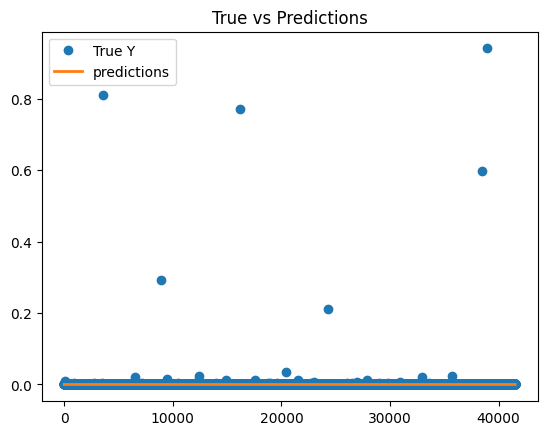

In [59]:
# Above confirms this model is terrible. 
# Take a look at the graph below, gives us a better view of the model
plt.title('True vs Predictions')
plt.plot(y_test__reg, linestyle='', marker='o', label='True Y')
plt.plot(test_preds[0], ls='-', lw=2, label='predictions')
plt.legend(loc='best')


In [60]:
# How did our model do for training
# import some metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [61]:
# Grabbing the accuracy score
# Note, we cannot just get the predictions as this would produce continuous values
# Imagine the model is reporting 99% accuracy. 
# Accuracy is misleading here
accuracy_score(y_true=y_test_clf, y_pred=np.round(test_preds[1]))

0.9996869129618033

In [62]:
# import seaborn
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sns

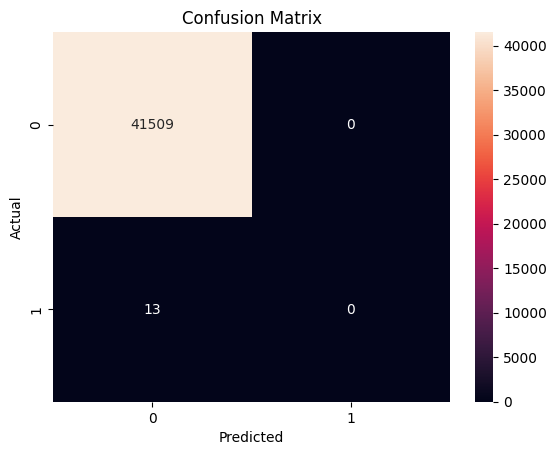

In [63]:
# Looking at the confusion matrix
# To get a better understanding of reading the confusion matrix, see
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
sns.heatmap(confusion_matrix(y_true=y_test_clf, y_pred=np.round(test_preds[1])), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [64]:
# Imagine this model has no true positives. Yet above, it reported 99% accuracy.
# Don't be fooled by accuracy

In [65]:
# Let's save the model
import os

In [66]:
# Create the location to save the model
PATH = './SAVED_MODELS/TF_FUNCTIONAL_MIMO/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

In [67]:
# Save the model
tf.keras.models.save_model(model=reg_clf_model, filepath=f'{PATH}/tf_mimo_functional_model.tf', \
                           overwrite=True, save_format='tf')

INFO:tensorflow:Assets written to: ./SAVED_MODELS/TF_FUNCTIONAL_MIMO//tf_mimo_functional_model.tf\assets


INFO:tensorflow:Assets written to: ./SAVED_MODELS/TF_FUNCTIONAL_MIMO//tf_mimo_functional_model.tf\assets


In [68]:
# With the model saved, time to load it
loaded_tf_reg_clf_model = tf.keras.models.load_model(filepath=f'{PATH}tf_mimo_functional_model.tf')
loaded_tf_reg_clf_model

In [69]:
# Make a prediction
loaded_tf_reg_clf_model.predict(x=[min_max_reg.transform(new_reg_sample), \
                                              pca.transform(min_max_clf.transform(new_clf_sample))])

1/1 [==============================] - 0s 139ms/step


[array([[-9.404879e-05]], dtype=float32), array([[0.00014536]], dtype=float32)]

In [ ]:
# Moving on!

Additional References and good reads: <br>
https://www.tensorflow.org/guide/keras/train_and_evaluate/#class_weights <br>
https://stackoverflow.com/questions/66845924/multi-input-multi-output-model-with-keras-functional-api <br>
https://pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/ <br>
https://towardsdatascience.com/how-to-build-tensorflow-models-with-the-keras-functional-api-bb6f084def83 <br>
https://goodboychan.github.io/python/coursera/tensorflow/deeplearning.ai/2022/02/05/01-Tensorflow2-Functional-API.html <br>
